In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
def custom_tanh(x):
    return (K.exp(x) - K.exp(-x)) / (K.exp(x) + K.exp(-x))
def custom_relu(x):
    return K.maximum(0.0, x)
def custom_sigmoid(x):
    return 1 / (1 + K.exp(-x))
model = Sequential([ Dense(64, input_shape=(10,)), 
    Activation(custom_relu), Dense(64), Activation(custom_tanh), Dense(1), Activation(custom_sigmoid) ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
np.random.seed(0)
X_train = np.random.random((100, 10))  
Y_train = np.random.randint(2, size=(100, 1))  
model.fit(X_train, Y_train, epochs=10, batch_size=10)
predictions = model.predict(X_train[:5])
print("Predictions:\n", predictions)
binary_predictions = (predictions > 0.5).astype(int)

accuracy = accuracy_score(Y_train[:5], binary_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_train[:5], binary_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(Y_train[:5], binary_predictions)
print("Recall:", recall)

# F1-score
f1 = f1_score(Y_train[:5], binary_predictions)
print("F1-score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_train[:5], binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def train_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    return history.history['accuracy'][-1] * 100
accuracy_gd = train_model('sgd')
accuracy_sgd = train_model('adam')
print("Gradient Descent Accuracy: {:.2f}%".format(accuracy_gd))
print("Stochastic Gradient Descent Accuracy: {:.2f}%".format(accuracy_sgd))

Gradient Descent Accuracy: 95.84%
Stochastic Gradient Descent Accuracy: 99.27%


Dropout Probability: 0.1 - Test Accuracy: 0.9520999789237976
Dropout Probability: 0.2 - Test Accuracy: 0.9435999989509583
Dropout Probability: 0.3 - Test Accuracy: 0.9334999918937683
Dropout Probability: 0.4 - Test Accuracy: 0.7386999726295471
Dropout Probability: 0.5 - Test Accuracy: 0.21209999918937683
Clipout Value: 0.1 - Test Accuracy: 0.9695000052452087
Clipout Value: 0.2 - Test Accuracy: 0.97079998254776
Clipout Value: 0.3 - Test Accuracy: 0.9704999923706055
Clipout Value: 0.4 - Test Accuracy: 0.9700000286102295
Clipout Value: 0.5 - Test Accuracy: 0.968999981880188


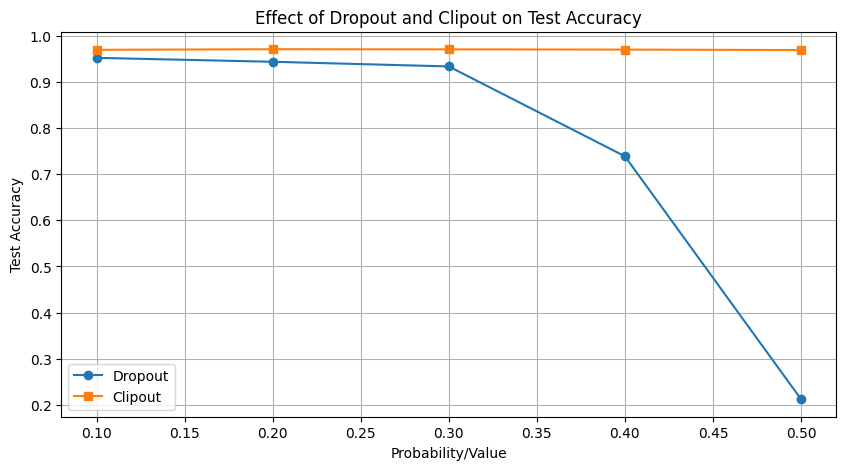

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define user-defined activation function
def custom_activation(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

# Function to create and train the model with given dropout probability or clipout value
def train_model(activation_type, value):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(64, activation=custom_activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    if activation_type == 'dropout':
        model.add(tf.keras.layers.Dropout(value))
        model.add(tf.keras.layers.Dropout(value))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    elif activation_type == 'clipout':
        opt = tf.keras.optimizers.Adam(clipvalue=value)  # Gradient clipping
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a list of dropout probabilities to test
dropout_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
# Define a list of clipout values to test
clipout_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize lists to store accuracies
dropout_accuracies = []
clipout_accuracies = []

# Test dropout probabilities
for dropout_prob in dropout_probs:
    accuracy = train_model('dropout', dropout_prob)
    dropout_accuracies.append(accuracy)
    print("Dropout Probability:", dropout_prob, "- Test Accuracy:", accuracy)

# Test clipout values
for clipout_value in clipout_values:
    accuracy = train_model('clipout', clipout_value)
    clipout_accuracies.append(accuracy)
    print("Clipout Value:", clipout_value, "- Test Accuracy:", accuracy)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(dropout_probs, dropout_accuracies, marker='o', label='Dropout')
plt.plot(clipout_values, clipout_accuracies, marker='s', label='Clipout')
plt.xlabel('Probability/Value')
plt.ylabel('Test Accuracy')
plt.title('Effect of Dropout and Clipout on Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

max_features = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

def predict_sentiment(text, model, maxlen=maxlen):
    tokens = imdb.get_word_index()
    tokens = {k: (v + 3) for k, v in tokens.items()}
    tokens["<PAD>"] = 0
    tokens["<START>"] = 1
    tokens["<UNK>"] = 2
    tokens["<UNUSED>"] = 3
    
    reverse_tokens = dict([(value, key) for (key, value) in tokens.items()])
    
    sequence = [tokens.get(word, tokens["<UNK>"]) for word in text.split()]
    sequence = pad_sequences([sequence], maxlen=maxlen)
    
    prediction = model.predict(sequence)[0, 0]
    sentiment = "positive" if prediction >= 0.5 else "negative"
    return sentiment, prediction

#text1 = "This movie was great! I really enjoyed it."
#text2 = "The acting was terrible and the plot was boring."



text1= input(" ENTER YOUR TEXT : ")
text2= input ("ENTER SECOND TEXT : ")

sentiment1, score1 = predict_sentiment(text1, model)
sentiment2, score2 = predict_sentiment(text2, model)

print(f"Text: '{text1}' | Sentiment: {sentiment1} | Score: {score1:.4f}")
print(f"Text: '{text2}' | Sentiment: {sentiment2} | Score: {score2:.4f}")

Epoch 1/100
157/157 [==============================] - 3s 15ms/step - loss: 0.5768 - accuracy: 0.6733 - val_loss: 0.4152 - val_accuracy: 0.8176
Epoch 2/100
157/157 [==============================] - 2s 15ms/step - loss: 0.3307 - accuracy: 0.8618 - val_loss: 0.3660 - val_accuracy: 0.8434
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 0.2207 - accuracy: 0.9192 - val_loss: 0.3772 - val_accuracy: 0.8352
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 0.1275 - accuracy: 0.9560 - val_loss: 0.4630 - val_accuracy: 0.8360
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0690 - accuracy: 0.9806 - val_loss: 0.5026 - val_accuracy: 0.8168
Epoch 6/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.5757 - val_accuracy: 0.8208
Epoch 7/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0155 - accuracy: 0.9975 - val_loss: 0.6234 - val_accuracy: